In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [8]:

df = pd.read_csv("../data/processed/trained_cleaned.csv")
df.head()

,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Total_EMI_per_month,Credit_History_Age_Months,Credit_Score_Encoded,Credit_Mix_Encoded,Total_Num_Accounts,Debt_Per_Account,Debt_to_Income_Ratio,Delayed_Payments_Per_Account
0,19114.12,3,4,3,4,5,4,6.27,4.0,809.98,49.574949,268,2.0,2.0,7,115.711429,0.042376,0.571429
1,19114.12,3,4,3,4,6,0,11.27,4.0,809.98,49.574949,269,2.0,2.0,7,115.711429,0.042376,0.000000
2,19114.12,3,4,3,4,3,8,11.27,4.0,809.98,49.574949,271,2.0,2.0,7,115.711429,0.042376,1.142857
3,19114.12,3,4,3,4,3,6,11.27,4.0,809.98,49.574949,0,1.0,2.0,7,115.711429,0.042376,0.857143
4,34847.84,2,4,6,1,7,1,7.42,2.0,605.03,18.816215,320,2.0,2.0,6,100.838333,0.017362,0.166667


In [9]:


# Load your dataset
df = pd.read_csv("../data/processed/smote.csv")

# Adjust target column name to match your dataset
X = df.drop("Credit_Score_Encoded", axis=1)
y = df["Credit_Score_Encoded"]


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# (Optional) Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train MLP model (equivalent to `nnet`)
model = MLPClassifier(hidden_layer_sizes=(10,), max_iter=500, random_state=123)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.68


In [10]:
# Load data
data = pd.read_csv("../data/processed/smote.csv")

# Separate features and target
X = data.drop(columns=["Credit_Score_Encoded"])
y = data["Credit_Score_Encoded"]  # Assuming 'Credit_Score_Encoded' is the target variable

# Train-test split with stratification (like createDataPartition in R)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.20,      # 20% test data (80% train)
    random_state=42,     # seed
    stratify=y           # keep class proportions same in train/test
)


In [11]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

# Create a pipeline with scaling + multinomial logistic regression
model = make_pipeline(
    StandardScaler(),
    LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=120)
)

# Train model
model.fit(X_train, y_train_encoded)

# Save the model pipeline
joblib.dump(model, '../models/logistic_regression_model.pkl')

print(model)


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(max_iter=1000, multi_class='multinomial',
                                    random_state=120))])


In [12]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

# Create and train multinomial logistic regression model pipeline
model = make_pipeline(
    StandardScaler(),
    LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=120)
)
model.fit(X_train, y_train_encoded)

# Save the trained model pipeline
joblib.dump(model, '../models/logistic_regression_model.pkl')

# Save the label encoder (to decode labels later)
joblib.dump(le, '../models/label_encoder.pkl')

# Print the model info
print(model)


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(max_iter=1000, multi_class='multinomial',
                                    random_state=120))])


In [16]:
model = joblib.load('../models/logistic_regression_model.pkl')
le = joblib.load('../models/label_encoder.pkl')

# Make predictions (returns encoded labels)
y_pred_encoded = model.predict(X_test)

# Decode the predicted labels back to original classes
y_pred = le.inverse_transform(y_pred_encoded)
predictions=y_pred
print(y_pred)


[1 2 1 ... 1 1 1]


Confusion Matrix:
      0     1     2
0  4533  2285   913
1  1851  7028  1050
2  1173   771  1871

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.59      0.59      7731
           1       0.70      0.71      0.70      9929
           2       0.49      0.49      0.49      3815

    accuracy                           0.63     21475
   macro avg       0.59      0.59      0.59     21475
weighted avg       0.62      0.63      0.63     21475



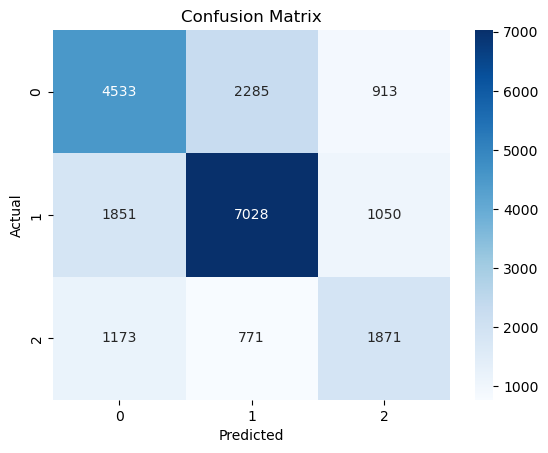

In [19]:


# Assuming predictions and y_test are available and both are arrays or Series of labels

# Compute confusion matrix
cm = confusion_matrix(y_test, predictions)

# Print confusion matrix as a table
print("Confusion Matrix:")
print(pd.DataFrame(cm, index=le.classes_, columns=le.classes_))


# Print classification report (precision, recall, f1-score)
print("\nClassification Report:")
print(classification_report(y_test, predictions))

# Optional: plot confusion matrix heatmap
xticklabels=le.classes_,
yticklabels=le.classes_

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



In [20]:
def specificity_score(y_true, y_pred, average='macro'):
    cm = confusion_matrix(y_true, y_pred)
    FP = cm.sum(axis=0) - np.diag(cm)  
    TN = cm.sum() - (FP + np.diag(cm) + (cm.sum(axis=1) - np.diag(cm)))
    specificity = TN / (TN + FP)
    if average == 'macro':
        return np.mean(specificity)
    elif average == 'weighted':
        weights = np.sum(cm, axis=1) / np.sum(cm)
        return np.sum(specificity * weights)
    else:
        return specificity  # returns array per class

spec = specificity_score(y_test, predictions)
print(f"Specificity (macro): {spec:.4f}")


Specificity (macro): 0.8014


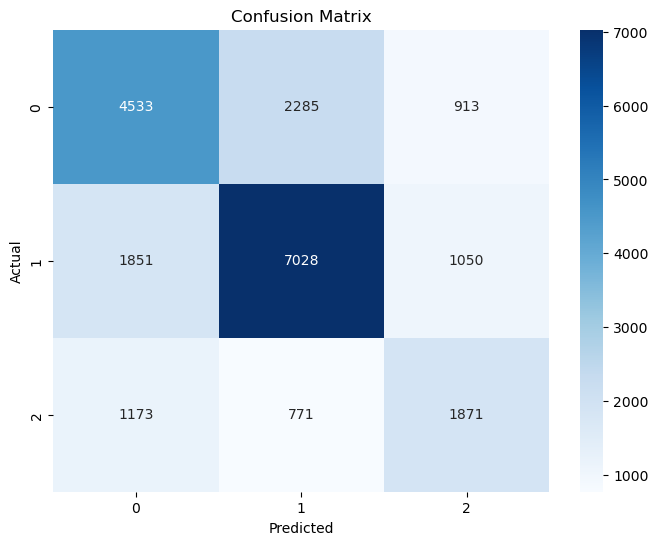

In [22]:
cm = confusion_matrix(y_test, predictions)

# Get class labels

class_names = le.classes_

# Create a DataFrame for the confusion matrix (for nicer plotting)
cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [24]:
cm = pd.crosstab(y_test, predictions, rownames=['Actual'], colnames=['Predicted'])

print(cm)


Predicted     0     1     2
Actual                     
0          4533  2285   913
1          1851  7028  1050
2          1173   771  1871


In [25]:
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.60      0.59      0.59      7731
           1       0.70      0.71      0.70      9929
           2       0.49      0.49      0.49      3815

    accuracy                           0.63     21475
   macro avg       0.59      0.59      0.59     21475
weighted avg       0.62      0.63      0.63     21475

